In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import cv2
import os

In [2]:
!ls BCCD/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
train_df = pd.read_csv("BCCD/ImageSets/Main/train.txt", sep = " ", header=None)
val_df = pd.read_csv("BCCD/ImageSets/Main/val.txt", sep = " ", header=None)

In [4]:
train_df.head()

,0
0,BloodImage_00001
1,BloodImage_00003
2,BloodImage_00004
3,BloodImage_00005
4,BloodImage_00006


In [5]:
val_df.head()

,0
0,BloodImage_00000
1,BloodImage_00002
2,BloodImage_00014
3,BloodImage_00017
4,BloodImage_00028


In [6]:
images_path = os.listdir("BCCD/JPEGImages/")
len(images_path)

364

In [7]:
def show_images():
    plt.figure(figsize=(15,15))
    for i in range(10):
        n = np.random.choice(364, 1)
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        image = plt.imread(os.path.join("BCCD/JPEGImages/", images_path[int(n)]))
        plt.imshow(image)
    plt.show()

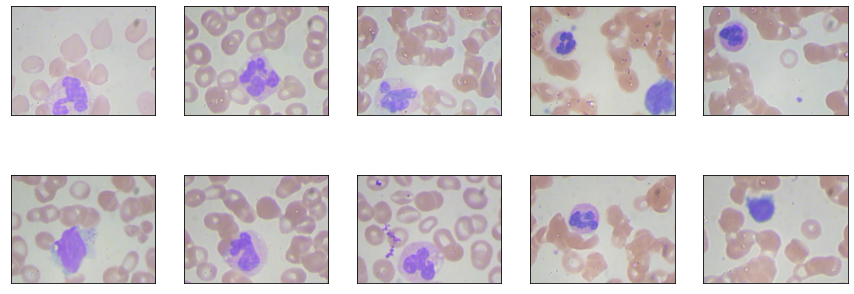

In [8]:
show_images()

In [9]:
# Total number of train and validation images
len(train_df[0].tolist()), len(val_df[0].tolist())

(205, 87)

In [10]:
# Training images & their annotations
for path in train_df[0].tolist():
    image_path = os.path.join("BCCD/JPEGImages/", path + ".jpg")
    annotation_path = os.path.join("BCCD/Annotations/", path + ".xml")
    i_path = os.path.join("images/train", path + ".jpg")
    a_path = os.path.join("images/train", path + ".xml")
    shutil.copy2(image_path, i_path)
    shutil.copy2(annotation_path, a_path)

In [11]:
# Validation images & their annotations
for path in val_df[0].tolist():
    image_path = os.path.join("BCCD/JPEGImages/", path + ".jpg")
    annotation_path = os.path.join("BCCD/Annotations/", path + ".xml")
    i_path = os.path.join("images/test", path + ".jpg")
    a_path = os.path.join("images/test", path + ".xml")
    shutil.copy2(image_path, i_path)
    shutil.copy2(annotation_path, a_path)

In [12]:
len(os.listdir("images/train")), len(os.listdir("images/test"))

(410, 261)

In [13]:
# copy the annotation files of the training images
for path in train_df[0].tolist():
    image_path = os.path.join("BCCD/Annotations/", path + ".xml")
    p = os.path.join("images/train", path + ".xml")
    shutil.copy2(image_path, p)

In [14]:
# copy the annotation files of the validation images
for path in val_df[0].tolist():
    path = path.split(".")[0] + ".xml"
    image_path = os.path.join("BCCD/Annotations/", path)
    p = os.path.join("images/test", path + ".xml")
    shutil.copy2(image_path, p)

In [15]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    for directory in ['train','test']:
        image_path = os.path.join(os.getcwd(), 'images/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.
Successfully converted xml to csv.


In [16]:
train_labels = pd.read_csv("data/train_labels.csv")
test_labels = pd.read_csv("data/test_labels.csv")

In [17]:
train_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,BloodImage_00001.jpg,640,480,WBC,68,315,286,480
1,BloodImage_00001.jpg,640,480,RBC,346,361,446,454
2,BloodImage_00001.jpg,640,480,RBC,53,179,146,299
3,BloodImage_00001.jpg,640,480,RBC,449,400,536,480
4,BloodImage_00001.jpg,640,480,RBC,461,132,548,212


In [18]:
test_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,BloodImage_00000.jpg,640,480,WBC,260,177,491,376
1,BloodImage_00000.jpg,640,480,RBC,78,336,184,435
2,BloodImage_00000.jpg,640,480,RBC,63,237,169,336
3,BloodImage_00000.jpg,640,480,RBC,214,362,320,461
4,BloodImage_00000.jpg,640,480,RBC,414,352,506,445


In [19]:
train_labels["class"].value_counts()

RBC          2382
WBC           214
Platelets     209
Name: class, dtype: int64

In [20]:
test_labels["class"].value_counts()

RBC          1936
WBC           174
Platelets     166
Name: class, dtype: int64

In [23]:
python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record

SyntaxError: invalid syntax (<ipython-input-23-c2c5b2006d61>, line 1)

In [21]:
"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python3 generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record

  # Create test data:
  python3 generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record
"""
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

flags = tf.app.flags
flags.DEFINE_string('csv_input', '', 'Path to the CSV input')
flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
FLAGS = flags.FLAGS


# TO-DO replace this with label map
def class_text_to_int(row_label):
    if row_label == 'RBC':
        return 1
    if row_label == 'WBC':
        return 2
    if row_label == 'Platelets':
        return 3
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


def main(_):
    writer = tf.python_io.TFRecordWriter(FLAGS.output_path)
    path = os.path.join(os.getcwd(), 'images/test')
    print(path)
    examples = pd.read_csv(FLAGS.csv_input)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = os.path.join(os.getcwd(), FLAGS.output_path)
    print(path)
    print('Successfully created the TFRecords: {}'.format(output_path))


if __name__ == '__main__':

    tf.app.run()

NotFoundError: Failed to create a NewWriteableFile:  : The system cannot find the path specified.
; No such process

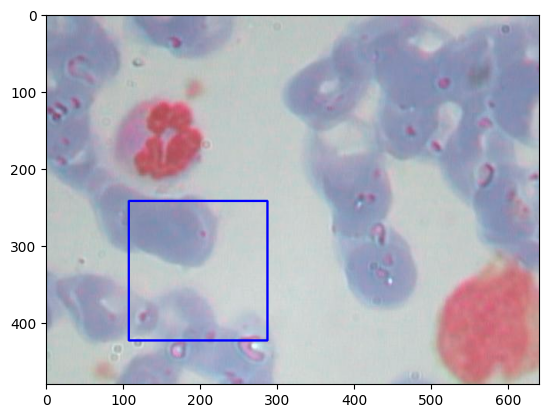

In [ ]:
image_1 = cv2.imread('images/train/BloodImage_00043.jpg')
image_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)
cv2.rectangle(image_1, (107, 242), (287, 423), (255,0,0), 2)
cv2.imwrite('rectangle.png', image_1)

image = plt.imread('rectangle.png')
plt.imshow(image)
plt.show()